In [7]:
import pandas as pd
import numpy as np
import time
import os
import seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
df = pd.read_excel("Dummy_Sales_Data.xlsx")
df.head()

,OrderID,Quantity,UnitPrice(USD),Status,OrderDate,Product_Category,Sales_Manager,Shipping_Cost(USD),Delivery_Time(Days),Shipping_Address,Product_Code
0,29511,92,238,Not Delivered,2021-08-08,Healthcare,Pablo,21,25.0,Singapore,HC-188
1,21819,61,136,Not Delivered,2021-10-03,Office,Pablo,34,14.0,UK,O-555
2,32391,67,235,Not Delivered,2021-09-27,Office,Kristen,25,11.0,Kenya,O-188
3,11126,33,133,Not Shipped,2021-07-30,Fashion,Abdul,34,24.0,USA,F-555
4,15483,13,189,Not Delivered,2021-08-15,Fashion,Stella,24,19.0,Kenya,F-555


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   OrderID              9999 non-null   int64         
 1   Quantity             9999 non-null   int64         
 2   UnitPrice(USD)       9999 non-null   int64         
 3   Status               9999 non-null   object        
 4   OrderDate            9999 non-null   datetime64[ns]
 5   Product_Category     9963 non-null   object        
 6   Sales_Manager        9999 non-null   object        
 7   Shipping_Cost(USD)   9999 non-null   int64         
 8   Delivery_Time(Days)  9948 non-null   float64       
 9   Shipping_Address     9999 non-null   object        
 10  Product_Code         9999 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 859.4+ KB


<AxesSubplot:xlabel='Quantity'>

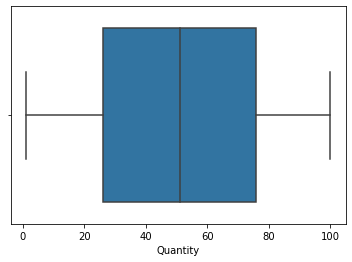

In [4]:
sns.boxplot(x=df["Quantity"])

### 1

In [8]:
def shipsize(row):  
    if row['Quantity'] > 0 and row['Quantity'] <= 30:
        return 'Small'
    elif row['Quantity'] > 30 and row['Quantity'] <= 60:
        return 'Medium'
    elif row['Quantity'] > 60  and row['Quantity'] <= 100:
        return 'Large'
    return 'NotDefined'

In [9]:
df['Shipment_Size'] = df.apply(lambda row: shipsize(row), axis=1)
df.head()

,OrderID,Quantity,UnitPrice(USD),Status,OrderDate,Product_Category,Sales_Manager,Shipping_Cost(USD),Delivery_Time(Days),Shipping_Address,Product_Code,Shipment_Size
0,29511,92,238,Not Delivered,2021-08-08,Healthcare,Pablo,21,25.0,Singapore,HC-188,Large
1,21819,61,136,Not Delivered,2021-10-03,Office,Pablo,34,14.0,UK,O-555,Large
2,32391,67,235,Not Delivered,2021-09-27,Office,Kristen,25,11.0,Kenya,O-188,Large
3,11126,33,133,Not Shipped,2021-07-30,Fashion,Abdul,34,24.0,USA,F-555,Medium
4,15483,13,189,Not Delivered,2021-08-15,Fashion,Stella,24,19.0,Kenya,F-555,Small


In [27]:
df.drop(["Shipment_Size"], axis=1, inplace=True)
df.head()


,OrderID,Quantity,UnitPrice(USD),Status,OrderDate,Product_Category,Sales_Manager,Shipping_Cost(USD),Delivery_Time(Days),Shipping_Address,Product_Code,colF
0,29511,92,238,Not Delivered,2021-08-08,Healthcare,Pablo,21,25.0,Singapore,HC-188,Large
1,21819,61,136,Not Delivered,2021-10-03,Office,Pablo,34,14.0,UK,O-555,Large
2,32391,67,235,Not Delivered,2021-09-27,Office,Kristen,25,11.0,Kenya,O-188,Large
3,11126,33,133,Not Shipped,2021-07-30,Fashion,Abdul,34,24.0,USA,F-555,Medium
4,15483,13,189,Not Delivered,2021-08-15,Fashion,Stella,24,19.0,Kenya,F-555,Small


### 2

In [19]:
condlist = [
  np.logical_and(df['Quantity'].gt(0), np.less_equal(df['Quantity'], 30)),
  np.logical_and(df['Quantity'].gt(30), np.less_equal(df['Quantity'],60)),
  np.logical_and(df['Quantity'].gt(60), np.less_equal(df['Quantity'],100)),
]

choicelist = ["Small","Medium","Large"]

In [20]:
df["Shipment_Size"] = pd.Series(np.select(condlist, choicelist, 'NotDefined'))
df.head()

,OrderID,Quantity,UnitPrice(USD),Status,OrderDate,Product_Category,Sales_Manager,Shipping_Cost(USD),Delivery_Time(Days),Shipping_Address,Product_Code,Shipment_Size
0,29511,92,238,Not Delivered,2021-08-08,Healthcare,Pablo,21,25.0,Singapore,HC-188,Large
1,21819,61,136,Not Delivered,2021-10-03,Office,Pablo,34,14.0,UK,O-555,Large
2,32391,67,235,Not Delivered,2021-09-27,Office,Kristen,25,11.0,Kenya,O-188,Large
3,11126,33,133,Not Shipped,2021-07-30,Fashion,Abdul,34,24.0,USA,F-555,Medium
4,15483,13,189,Not Delivered,2021-08-15,Fashion,Stella,24,19.0,Kenya,F-555,Small


In [16]:
%%timeit
df['Shipment_Size'] = df.apply(lambda row: shipsize(row), axis=1)

351 ms ± 46.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
%%timeit
df["Shipment_Size"] = pd.Series(np.select(conditions, shipsizes, 'NotDefined'))

2.26 ms ± 225 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
351/2.26

155.30973451327435

In [21]:
t = np.select(condlist, choicelist, 'NotDefined')

In [22]:
type(t)

numpy.ndarray

### 3

In [29]:
df.loc[np.logical_and(df['Quantity'].gt(0), np.less_equal(df['Quantity'], 30)), 'Shipment_Size'] = 'Small'
df.loc[np.logical_and(df['Quantity'].gt(30), np.less_equal(df['Quantity'], 60)),'Shipment_Size'] = 'Medium'
df.loc[np.logical_and(df['Quantity'].gt(60), np.less_equal(df['Quantity'], 100)),'Shipment_Size'] = 'Large'
df['Shipment_Size'].fillna('NotDefines', inplace=True)
df.head()

,OrderID,Quantity,UnitPrice(USD),Status,OrderDate,Product_Category,Sales_Manager,Shipping_Cost(USD),Delivery_Time(Days),Shipping_Address,Product_Code,colF,Shipment_Size
0,29511,92,238,Not Delivered,2021-08-08,Healthcare,Pablo,21,25.0,Singapore,HC-188,Large,Large
1,21819,61,136,Not Delivered,2021-10-03,Office,Pablo,34,14.0,UK,O-555,Large,Large
2,32391,67,235,Not Delivered,2021-09-27,Office,Kristen,25,11.0,Kenya,O-188,Large,Large
3,11126,33,133,Not Shipped,2021-07-30,Fashion,Abdul,34,24.0,USA,F-555,Medium,Medium
4,15483,13,189,Not Delivered,2021-08-15,Fashion,Stella,24,19.0,Kenya,F-555,Small,Small


In [28]:
%%timeit
df.loc[np.logical_and(df['Quantity'].gt(0), np.less_equal(df['Quantity'], 30)), 'Shipment_Size'] = 'Small'
df.loc[np.logical_and(df['Quantity'].gt(30), np.less_equal(df['Quantity'], 60)),'Shipment_Size'] = 'Medium'
df.loc[np.logical_and(df['Quantity'].gt(60), np.less_equal(df['Quantity'], 100)),'Shipment_Size'] = 'Large'
df['Shipment_Size'].fillna('NotDefines', inplace=True)

6.53 ms ± 462 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [30]:
351/6.53

53.75191424196018